In [73]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
import scipy.stats as stats

In [74]:
# Create dataframe from csv file
csvpath = os.path.join('city_data.csv')
city_df = pd.read_csv(csvpath)
city_df.head(10)

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban
5,South Josephville,4,Urban
6,West Sydneyhaven,70,Urban
7,Travisville,37,Urban
8,Torresshire,70,Urban
9,Lisaville,66,Urban


In [75]:
csvpath = os.path.join('ride_data.csv')
ride_df = pd.read_csv(csvpath)
ride_df.head(10)

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673
5,New Jeffrey,2016-02-22 18:36:25,36.01,9757888452346
6,Port Johnstad,2016-06-07 02:39:58,17.15,4352278259335
7,Jacobfort,2016-09-20 20:58:37,22.98,1500221409082
8,Travisville,2016-01-15 17:32:02,27.39,850152768361
9,Sandymouth,2016-11-16 07:27:00,21.61,2389035050524


In [151]:
city_ride_df = pd.merge(city_df, ride_df, on='city')
rides_per_city = pd.DataFrame(city_ride_df.groupby(["city"])["ride_id"].count())
#print(rides_per_city.head())

avg_per_city = pd.DataFrame(city_ride_df.groupby(['city'])['fare'].mean())
#print(avg_per_city.head())

drivers_per_city = pd.DataFrame(city_ride_df.groupby(['city'])['driver_count'].count())
#print(drivers_per_city.head())

city_types_df = pd.DataFrame(city_df[['type']])
city_types_df["city_type_color"] = ""
#print(city_types_df.head())

for index, row in city_types_df.iterrows():
    if row['type'] == 'Urban':
        city_types_df.set_value(index,'city_type_color','Gold')
    elif row['type'] == 'Suburban':
        city_types_df.set_value(index,'city_type_color','lightcoral')
    elif row['type'] == 'Rural':
        city_types_df.set_value(index,'city_type_color','lightskyblue')

#print(city_types_df.head())     


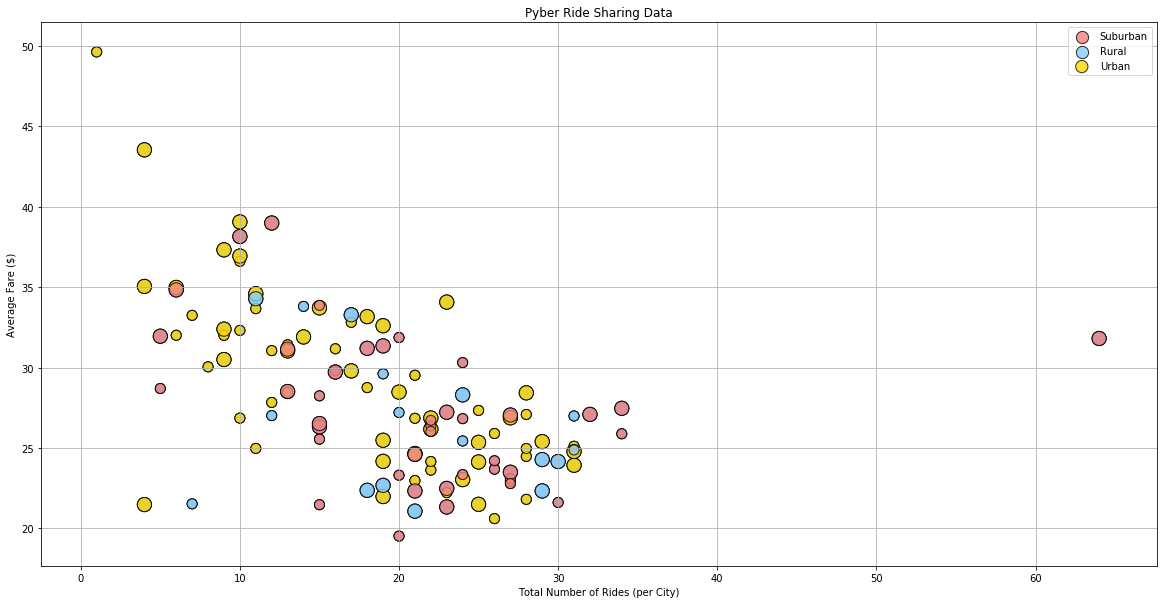

In [155]:
#fig, ax = plt.subplots()
plt.figure(figsize=(20, 10))
labels = ["Urban", "Suburban", "Rural"]
plt.scatter(rides_per_city['ride_id'], avg_per_city['fare'], c='lightcoral', 
            s=drivers_per_city['driver_count'], marker='o', edgecolor="black", sizes=(200,100),
            linewidths=1, alpha=0.8, label='Suburban')
plt.scatter(rides_per_city['ride_id'], avg_per_city['fare'], c='lightskyblue', 
            s=drivers_per_city['driver_count'], marker='o', edgecolor="black", sizes=(200,100),
            linewidths=1, alpha=0.8, label='Rural')
plt.scatter(rides_per_city['ride_id'], avg_per_city['fare'], c=city_types_df['city_type_color'], 
            s=drivers_per_city['driver_count'], marker='o', edgecolor="black", sizes=(200,100),
            linewidths=1, alpha=0.8, label='Urban')
plt.grid(True)
plt.legend()
plt.title('Pyber Ride Sharing Data')
plt.xlabel('Total Number of Rides (per City)')
plt.ylabel('Average Fare ($)')
plt.show()

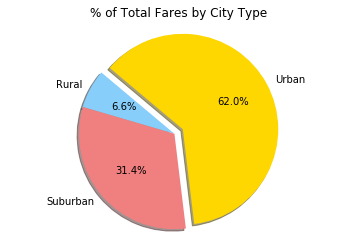

In [141]:
# Labels for the sections of the first pie chart
labels = ["Rural", "Suburban", "Urban"]
# The colors of each section of the pie chart
colors = ["lightskyblue", "lightcoral", "Gold"]
# Tells matplotlib to separate the "Urban" section using explode
explode = [0, 0, 0.1]

#Calculate the total fares 
tot_fares = city_ride_df['fare'].sum()

#Calculate total fare per each city
fare_per_type = pd.DataFrame(city_ride_df.groupby(["type"])["fare"].sum())
#fare_per_type.head()

perctg_per_type = fare_per_type['fare']/tot_fares*100
#perctg_per_type.head()

plt.pie(perctg_per_type, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.axis('equal')
plt.title('% of Total Fares by City Type')
plt.show()

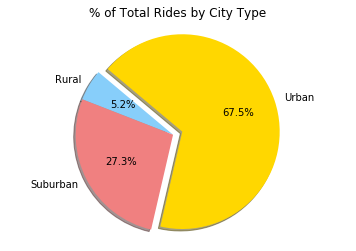

In [146]:
#Percentage of Total Rides by City Type

#Calculate the total number of rides
tot_rides = city_ride_df['ride_id'].count()

#Calculate number of rides per city type
rides_per_type = pd.DataFrame(city_ride_df.groupby(["type"])["ride_id"].count())

#Calculate the percentage of rides per city type
perct_rides_type = rides_per_type['ride_id']/tot_rides*100
#print(perct_rides_type.head())

plt.pie(perct_rides_type, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.axis('equal')
plt.title('% of Total Rides by City Type')
plt.show()

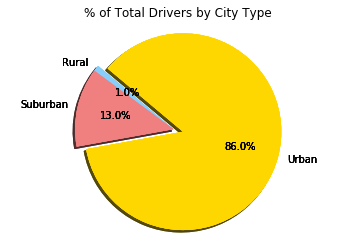

In [150]:
#Percentage of Total Drivers by City Type
#========================================
#Calculate the total number of drivers
tot_drivers = city_ride_df['driver_count'].sum()

#Calculate number of drivers per city type
drivers_per_type = pd.DataFrame(city_ride_df.groupby(['type'])['driver_count'].sum())

#Calculate the percentage of drivers per city type
perct_drivers_type = drivers_per_type['driver_count']/tot_drivers*100

#Create the plot pie chart
plt.pie(perct_drivers_type, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.axis('equal')
plt.title('% of Total Drivers by City Type')
plt.show()